In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [4]:

# Loading data
data = pd.read_csv('prep.csv')
data = pd.get_dummies(data, drop_first=True)

indep = data.drop('classification_yes', axis=1)
dep = data['classification_yes']

x_train, x_test, y_train, y_test = train_test_split(indep,dep,test_size=0.25,random_state=0)



In [5]:
# Train Random Forest and get feature importances
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(x_train, y_train)

# Display feature importances
importances = rf.feature_importances_
for feature, importance in zip(indep, importances):
    print(feature, importance)

# Feature selection based on importance threshold
threshold = 0.05
sfm = SelectFromModel(rf, threshold=threshold)
sfm.fit(x_train, y_train)

# Transform both x_train and x_test to include only selected features
x_train_selected = sfm.transform(x_train)
x_test_selected = sfm.transform(x_test)



age 0.007495006307939874
bp 0.0026760874838724137
al 0.11815946486841616
su 0.011186705464663592
bgr 0.04502916649618819
bu 0.010346970622041575
sc 0.20710400716815597
sod 0.00799465765075283
pot 0.004752462408478686
hrmo 0.19302045737538154
pcv 0.20659891052868395
wc 0.0038893897128755993
rc 0.03506506566909514
sg_b 0.023985027176419565
sg_c 0.021339816084604894
sg_d 0.017171025846709553
sg_e 0.0
rbc_normal 0.0011346041821653832
pc_normal 0.0037976900905596646
pcc_present 0.0
ba_present 0.0
htn_yes 0.03398446210223367
dm_yes 0.03431657160779614
cad_yes 0.0
appet_yes 0.0
pe_yes 0.010952451152965413
ane_yes 0.0


In [7]:

selected_feature_names = indep.columns[sfm.get_support()]
print("Selected Features:", selected_feature_names)

rf_selected = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf_selected.fit(x_train_selected, y_train)


Selected Features: Index(['al', 'bu', 'hrmo', 'pcv', 'rc'], dtype='object')


In [8]:
# predictions and evaluate
y_pred_selected = rf_selected.predict(x_test_selected)
cm_selected = confusion_matrix(y_test, y_pred_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

In [13]:
# Display evaluation metrics
print("Confusion Matrix (Selected Features):\n", cm_selected)
print("Accuracy (Selected Features):", accuracy_selected)
print("Classification Report (Selected Features):\n", report_selected)


Confusion Matrix (Selected Features):
 [[35  1]
 [ 3 61]]
Accuracy (Selected Features): 0.96
Classification Report (Selected Features):
               precision    recall  f1-score   support

       False       0.92      0.97      0.95        36
        True       0.98      0.95      0.97        64

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [15]:
# Visualize feature importances for the selected features
df = pd.DataFrame({'Feature_Names': selected_feature_names, 'Importances': rf_selected.feature_importances_})
df = df.sort_values(by='Importances', ascending=False)

df

,Feature_Names,Importances
2,hrmo,0.405418
3,pcv,0.264562
4,rc,0.174139
1,bu,0.091614
0,al,0.064266


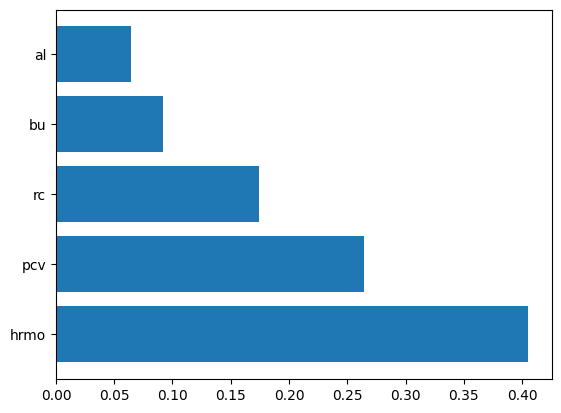

In [16]:
plt.barh(df['Feature_Names'], df['Importances'])
plt.show()